<a href="https://colab.research.google.com/github/mariam7084/ML_projects/blob/main/Medical_Insurance_Cost_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("insurance.csv")

In [51]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
df.shape

(1338, 7)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


in the dataset 'sex','smoker','region' are categorical features.

In [54]:
#checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [55]:
#getting the statistical measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-56-dc930e4a66d8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


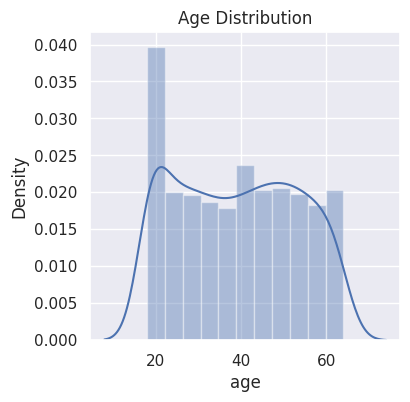

In [56]:
#visualizing the distribution of age
sns.set()
plt.figure(figsize = (4,4))
sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()

In [57]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

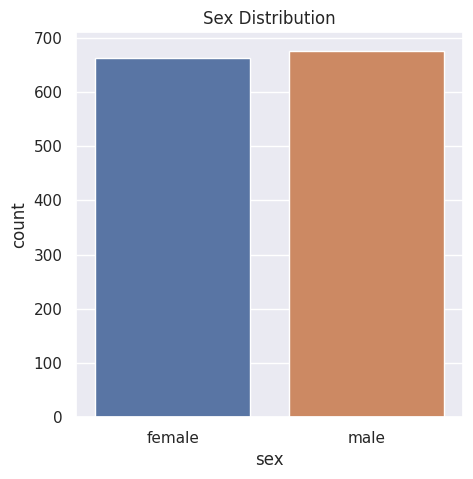

In [58]:
#visualizing the gender column
plt.figure(figsize = (5,5))
sns.countplot(x = 'sex', data = df)
plt.title("Sex Distribution")
plt.show()

<Figure size 600x600 with 0 Axes>

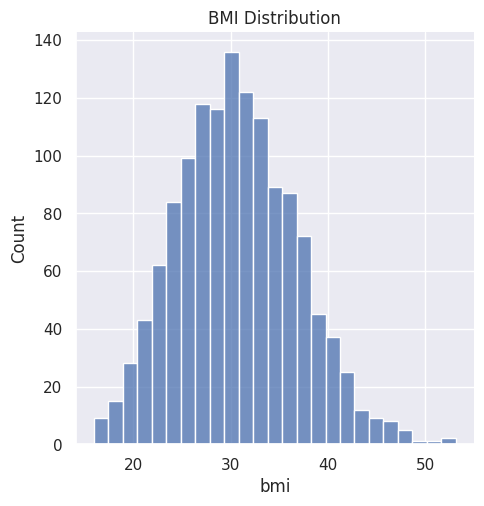

In [59]:
#visualizing the BMI  distribution
plt.figure(figsize = (6,6))
sns.displot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

In [60]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

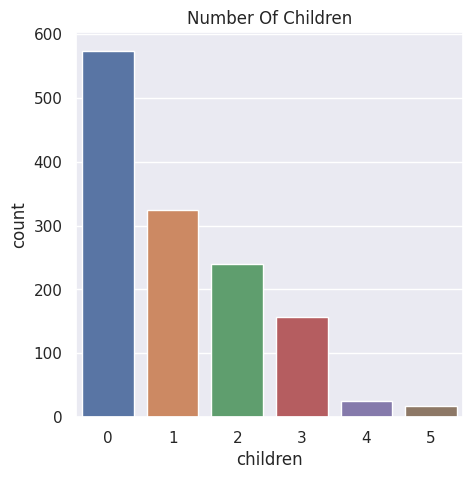

In [61]:
#visualizing the children column
plt.figure(figsize = (5,5))
sns.countplot(x = 'children', data = df)
plt.title("Number Of Children")
plt.show()

In [62]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

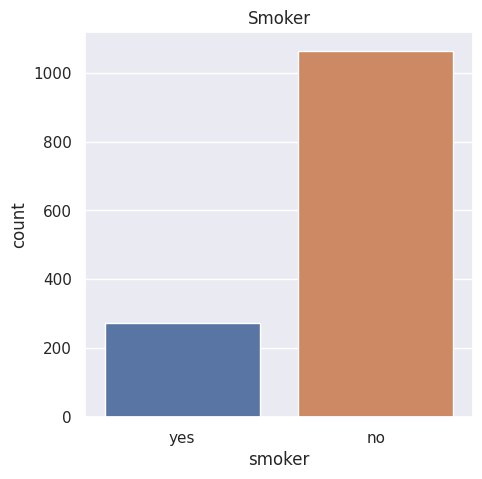

In [63]:
#visualizing the smoker column
plt.figure(figsize = (5,5))
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker')
plt.show()

In [64]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

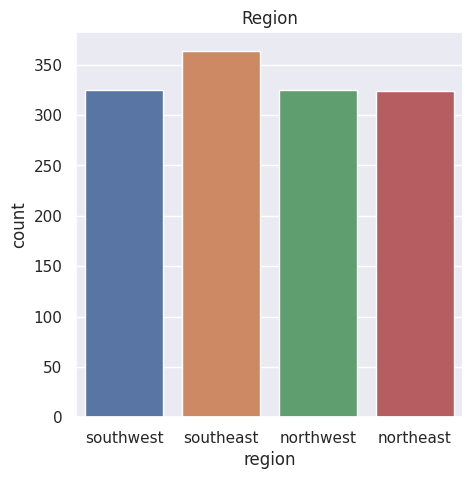

In [65]:
#visualizing the region column
plt.figure(figsize = (5,5))
sns.countplot(x = 'region', data = df)
plt.title('Region')
plt.show()

<ipython-input-66-82eed7e71b21>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


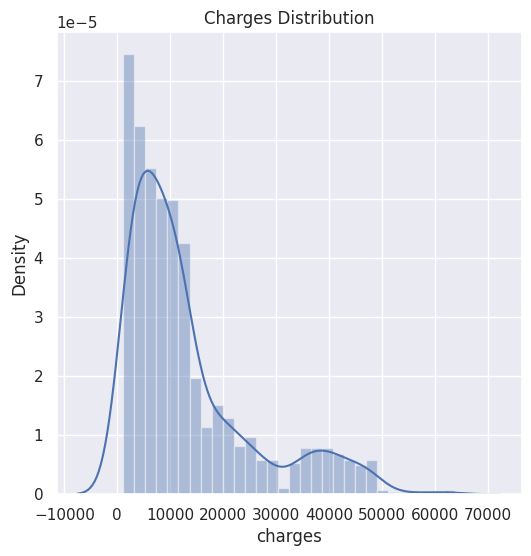

In [66]:
#visualizing the distribution of charge values
plt.figure(figsize = (6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

###Encoding the categorical features

In [67]:
df.replace({'sex':{'male': 0, "female": 1}}, inplace = True)
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


###Splitting the dataset

In [68]:
x = df.iloc[: ,:-1].values
y = df.iloc[: ,-1].values

In [69]:
print(x)

[[19.    1.   27.9   0.    0.    1.  ]
 [18.    0.   33.77  1.    1.    0.  ]
 [28.    0.   33.    3.    1.    0.  ]
 ...
 [18.    1.   36.85  0.    1.    0.  ]
 [21.    1.   25.8   0.    1.    1.  ]
 [61.    1.   29.07  0.    0.    3.  ]]


In [70]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


###Splitting the dataset into training set and testing set

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [72]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(1338, 6)
(1070, 6)
(268, 6)


##Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [74]:
y_pred = reg.predict(x_test)

In [75]:
from sklearn import metrics
# R squared value
r2_test = metrics.r2_score(y_test, y_pred)
print('R squared vale : ', r2_test)

R squared vale :  0.783021587162344


Making a Predicitve System

In [76]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[4016.99266999]
The insurance cost is USD  4016.9926699873304
